In [101]:
import os
import json
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print as pprint

from truthful_counterfactuals.utils import render_latex, latex_table
from truthful_counterfactuals.utils import EXPERIMENTS_PATH

PATH = os.getcwd()
plt.style.use('default')

In [102]:
results_map = {
    'ens_mve': {
        'method': 'Ensemble + MVE',
        'paths': [
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '01', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '02', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '03', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '04', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '05', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '06', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '07', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '08', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '09', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__ens_mve', '10', 'experiment_data.json'),
        ]
    },
    'rand': {
        'method': 'Random',
        'paths': [
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '01', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '02', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '03', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '04', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '05', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '06', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '07', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '08', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '09', 'experiment_data.json'),
            os.path.join(EXPERIMENTS_PATH, 'results', 'counterfactual_truthfulness__rand', '10', 'experiment_data.json'),
        ]
    }
}

print('loading the results...')
for key, info in results_map.items():

    info['results'] = []
    
    for path in info['paths']:
        
        with open(path, 'r') as file:
            content = file.read()
            data = json.loads(content)
            info['results'].append(data)
            
    info['truthfulness_increase'] = [
        data['counterfactual_truthfulness']['diff']
        for data in info['results']
    ]
    info['r2_test'] = [
        data['r2']['test']
        for data in info['results']
    ]
    info['auc_test'] = [
        data['uncertainty']['test']['auc_mean']
        for data in info['results']
    ]  
    info['rho_cf'] = [
        data['uncertainty']['counterfactual']['corr']
        for data in info['results']
    ]
    info['auc_cf'] = [
        data['uncertainty']['counterfactual']['auc_mean']
        for data in info['results']
    ]
        
        
print('example results layout:')
print(data.keys())
print('truthfulness:', data['truthfulness'].keys())
print('truthfulness/counterfactual', data['truthfulness']['counterfactual'].keys())
print('uncertainty:', data['uncertainty'].keys(), data['uncertainty']['counterfactual'])
print('r2:', data['r2'].keys())

loading the results...
example results layout:
dict_keys(['node_dim', 'edge_dim', 'r2', 'mae', 'uncertainty', 'uncertainty_threshold', 'truthfulness', 'counterfactual_truthfulness'])
truthfulness: dict_keys(['neighbor', 'counterfactual'])
truthfulness/counterfactual dict_keys(['thresholds', 'truthfulness', 'lengths'])
uncertainty: dict_keys(['test', 'neighbor', 'counterfactual']) {'corr': -0.03771638363321824, 'auc_mean': -0.05921557729178055, 'auc_max': 1.552564448647424e-06, '_thresholds_mean': [0.0, 0.010101010101010166, 0.02020202020202011, 0.030303030303030276, 0.04040404040404044, 0.0505050505050505, 0.06060606060606055, 0.07070707070707072, 0.08080808080808077, 0.09090909090909094, 0.101010101010101, 0.11111111111111105, 0.12121212121212122, 0.13131313131313127, 0.14141414141414133, 0.1515151515151515, 0.16161616161616166, 0.17171717171717182, 0.18181818181818177, 0.19191919191919193, 0.2020202020202021, 0.21212121212121204, 0.2222222222222222, 0.23232323232323238, 0.24242424242

plotting neighbor truthfulness curves...


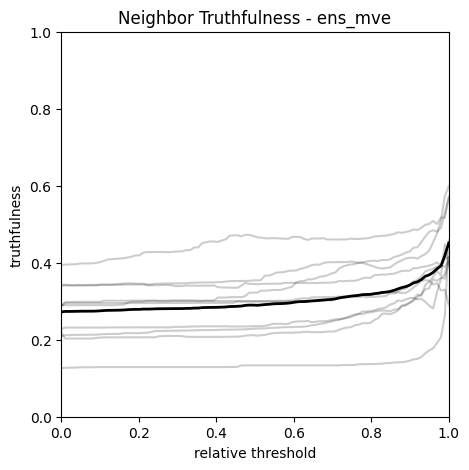

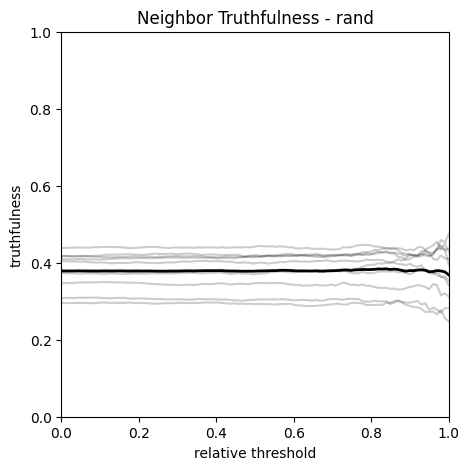

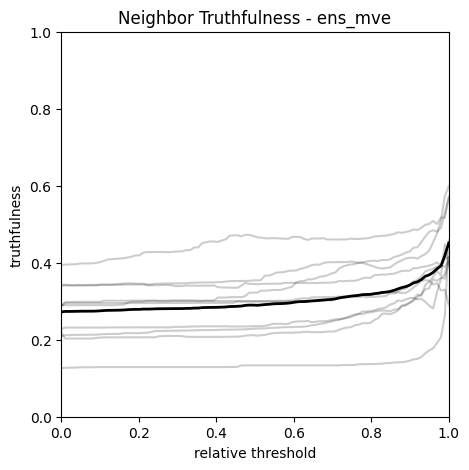

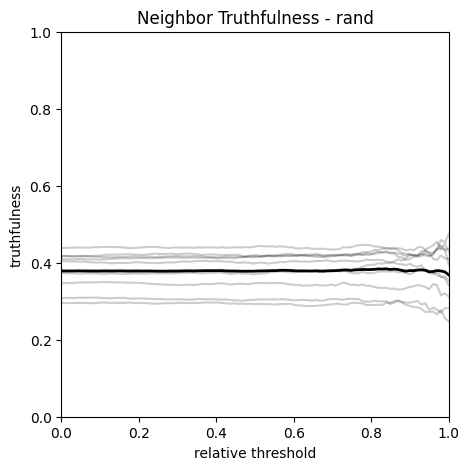

In [103]:
from IPython.display import display
print('plotting neighbor truthfulness curves...')

for key, info in results_map.items():
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlabel('relative threshold')
    ax.set_ylabel('truthfulness')
    ax.set_title(f'Neighbor Truthfulness - {key}')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
    neighbor_thresholds = [data['truthfulness']['neighbor']['thresholds'] for data in info['results']]
    neighbor_truthfulness = [data['truthfulness']['neighbor']['truthfulness'] for data in info['results']]
    
    for ths, trs in zip(neighbor_thresholds, neighbor_truthfulness):
        ax.plot(ths, trs, label=key, color='black', alpha=0.2)
        
    # The average curve
    avg_truthfulness = np.mean(neighbor_truthfulness, axis=0)
    ax.plot(ths, avg_truthfulness, color='black', linewidth=2)

    
    display(fig)

plotting counterfactual truthfulness curves...


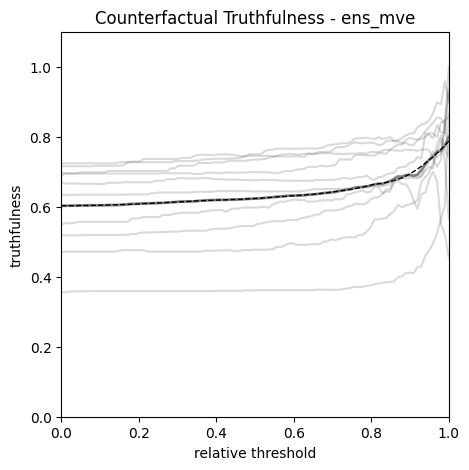

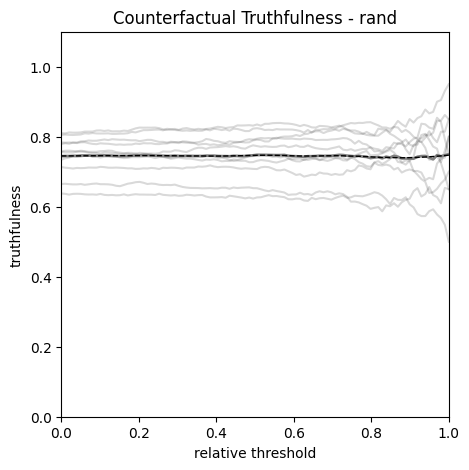

In [104]:
from IPython.display import display
from scipy.signal import savgol_filter

print('plotting counterfactual truthfulness curves...')

for key, info in results_map.items():
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlabel('relative threshold')
    ax.set_ylabel('truthfulness')
    ax.set_title(f'Counterfactual Truthfulness - {key}')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1.1])
    
    cf_thresholds = [data['truthfulness']['counterfactual']['thresholds'] for data in info['results']]
    cf_truthfulness = [data['truthfulness']['counterfactual']['truthfulness'] for data in info['results']]
    
    for ths, trs in zip(cf_thresholds, cf_truthfulness):
        ax.plot(ths, trs, label=key, color='black', alpha=0.15)
        
    # The average curve
    truthfulness_avg = np.mean(cf_truthfulness, axis=0)
    ax.plot(ths, truthfulness_avg, color='gray', linewidth=2)
    
    # Apply Savitzky-Golay filter for trend
    truthfulness_smooth = savgol_filter(truthfulness_avg, window_length=25, polyorder=2)
    ax.plot(ths, truthfulness_smooth, color='black', linewidth=1, ls='--', label='smoothed')

    #display(fig)

In [105]:
print('creating table...')

rows = []
for key, data in results_map.items():
    row = [
        data['method'],
        data['r2_test'],
        data['auc_test'],
        data['rho_cf'],
        data['auc_cf'],
        data['truthfulness_increase'],
    ]
    rows.append(row)

_, content = latex_table(
    column_names=['Method', r'Test $R^2$', r'Test $\text{UER-AUC}_{\text{mean}}$', r'$\rho$', r'$\text{UER-AUC}_{\text{mean}}$', r'Truthfulness Gain'],
    rows=rows,
)
    
tex_path = os.path.join(PATH, 'table_cf.tex')
with open(tex_path, mode='w') as file:
    file.write(content)
    
pdf_path = os.path.join(PATH, 'table_cf.pdf')
render_latex({'content': content}, pdf_path)


creating table...


0.28767210245132446
0.42673006653785706
0.34571086168289183
0.42750483751296997
0.32905346155166626
0.2908267617225647
0.32757943868637085
0.37515026330947876
0.48966091871261597
0.3708160281181335
UER-AUC - mean: 0.228 - std: 0.083


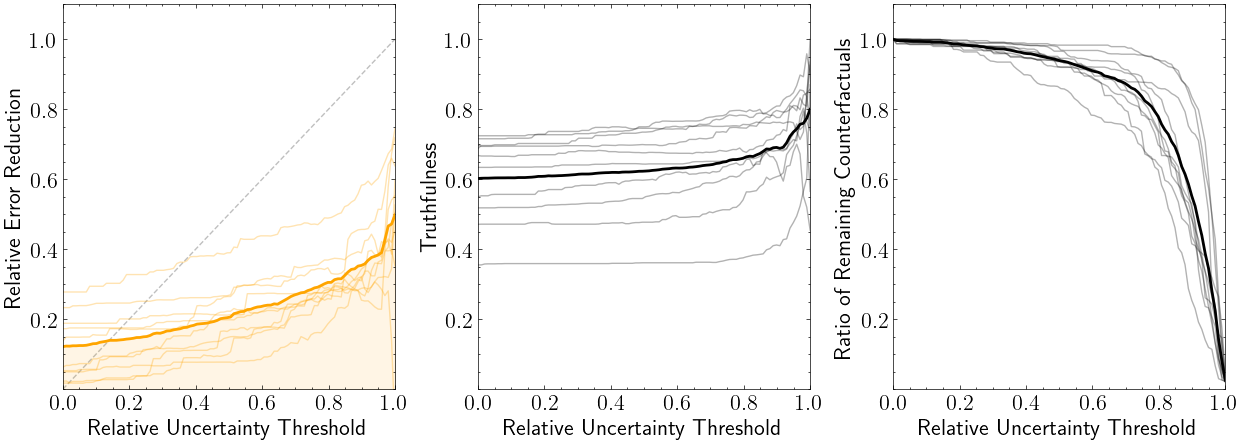

In [106]:
from sklearn.metrics import auc
from matplotlib import rcParams
import scienceplots

plt.style.use('science')
rcParams['font.size'] = 16
rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Open Sans']

# Plotting the three plots for the paper

key: str = 'ens_mve'
results = results_map[key]['results']

fig, (ax_auc, ax_tr, ax_num) = plt.subplots(
    ncols=3,
    nrows=1,
    figsize=(15, 5)
)
fig.subplots_adjust(wspace=0.25)

# ~ plotting UER-AUC curve

ths_list: list[list] = []
rds_list: list[list] = []
aucs: list[float] = []
for data in results:
    
    print(data['uncertainty_threshold'])
    ths = data['uncertainty']['counterfactual']['_thresholds_mean']
    ths_list.append(ths)
    
    rds = data['uncertainty']['counterfactual']['_reductions_mean']
    rds_list.append(rds)
    
    ax_auc.plot(ths, rds, color='orange', alpha=0.3)
    
    auc_value = auc(ths, rds)
    aucs.append(auc_value)
    
ths = np.mean(ths_list, axis=0)
rds = np.mean(rds_list, axis=0)
ax_auc.plot(ths, rds, color='orange', linewidth=2)
ax_auc.fill_between(ths, rds, color='orange', alpha=0.1)

ax_auc.plot([0, 1], [0, 1], color='gray', ls='--', alpha=0.5, zorder=-10)

ax_auc.set_ylabel('Relative Error Reduction')
ax_auc.set_ylim([0, 1.1])
ax_auc.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax_auc.set_xlabel('Relative Uncertainty Threshold')
ax_auc.set_xlim([0, 1])
ax_auc.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
print(f'UER-AUC - mean: {np.mean(aucs):.3f} - std: {np.std(aucs):.3f}')

# plotting Truthfulness Curve
ths_list: list[list] = []
trs_list: list[list] = []

for data in results:
    ths = data['truthfulness']['counterfactual']['thresholds']
    ths_list.append(ths)
    
    trs = data['truthfulness']['counterfactual']['truthfulness']
    trs_list.append(trs)
    
    ax_tr.plot(ths, trs, color='black', alpha=0.3)
    
ths = np.mean(ths_list, axis=0)
trs = np.mean(trs_list, axis=0)
ax_tr.plot(ths, trs, color='black', linewidth=2)
ax_tr.set_ylabel('Truthfulness')
ax_tr.set_ylim([0, 1.1])
ax_tr.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax_tr.set_xlabel('Relative Uncertainty Threshold')
ax_tr.set_xlim([0, 1])
ax_tr.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# plotting Number of Counterfactuals
ths_list: list[list] = []
lens_list: list[list] = []

for data in results:
    ths = data['truthfulness']['counterfactual']['thresholds']
    ths_list.append(ths)
    
    lens = data['truthfulness']['counterfactual']['lengths']
    lens = [l / lens[0] for l in lens]
    lens_list.append(lens)
    
    ax_num.plot(ths, lens, color='black', alpha=0.3)
    
ths = np.mean(ths_list, axis=0)
lens = np.mean(lens_list, axis=0)

ax_num.plot(ths, lens, color='black', linewidth=2)
ax_num.set_ylabel('Ratio of Remaining Counterfactuals')
ax_num.set_ylim([0, 1.1])
ax_num.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax_num.set_xlabel('Relative Uncertainty Threshold')
ax_num.set_xlim([0, 1])
ax_num.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

fig.savefig(os.path.join(PATH, 'counterfactuals_truthfulness.pdf'), bbox_inches='tight')